In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from mlxtend.regressor import StackingRegressor

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('baseball.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

# checking for missing values in dataset

In [5]:
df.isnull().sum()#there are no missing values in  the dataset

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Checking correlation between attributes

In [7]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [8]:
#we can see RA and ER are highly negatively correlated to the target variable 'W'.
#I have tried a model without dropping any column also.
#dropping these columns is giving a better score.

# Dropping highly negatively correlated attributes

In [9]:
df=df.drop(['RA','ER'],axis=1)

# EDA

# Univariate analysis

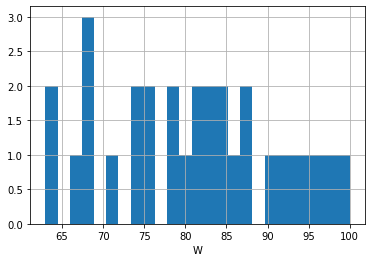

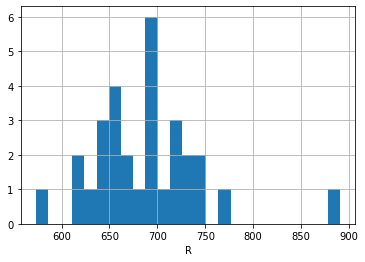

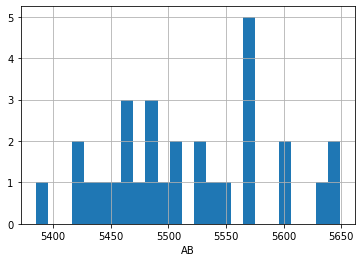

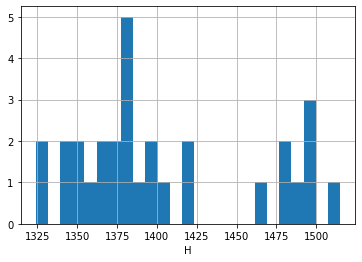

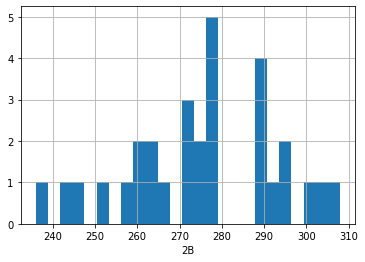

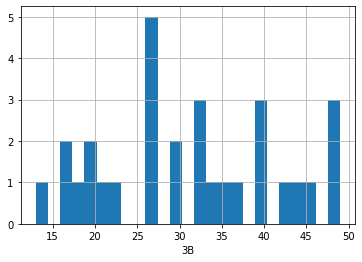

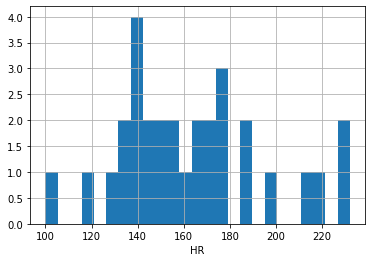

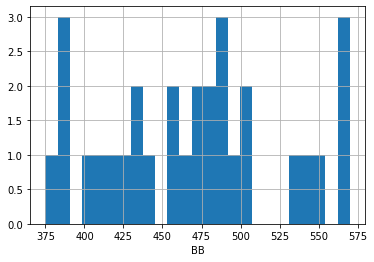

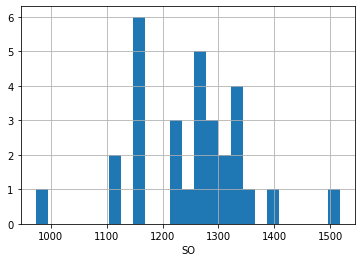

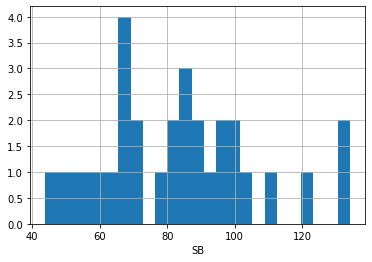

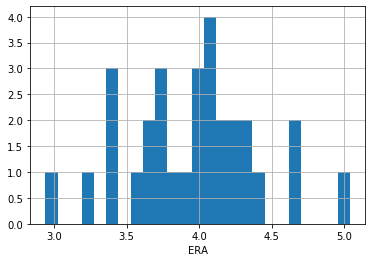

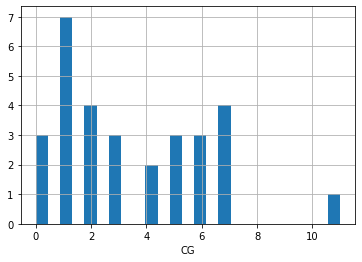

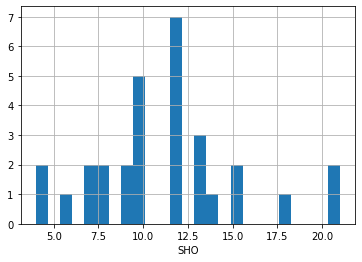

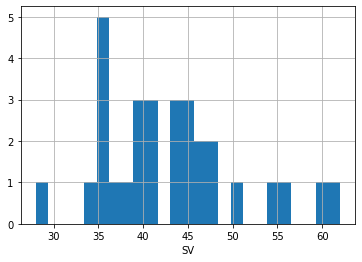

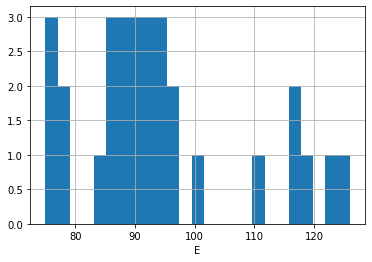

In [10]:
#checking skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [11]:
#We can see data is skewed,we need to change it to gaussian distribution before model building.
#Drawing isight from the data is difficult as no proper domain knowledge is available.

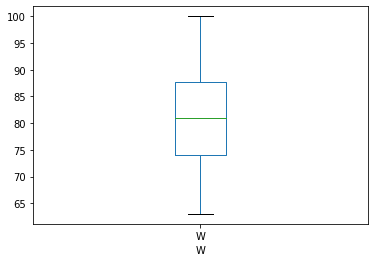

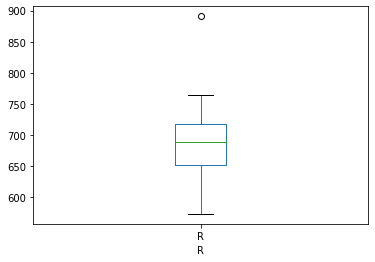

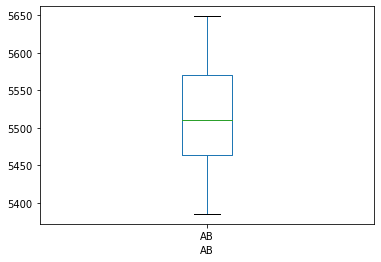

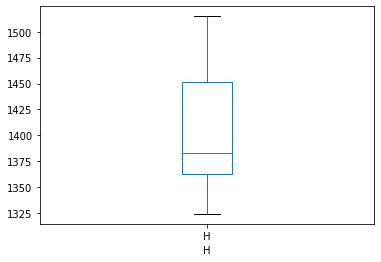

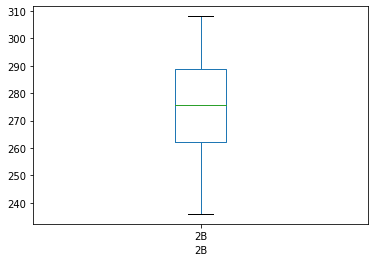

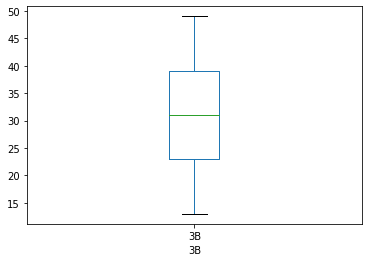

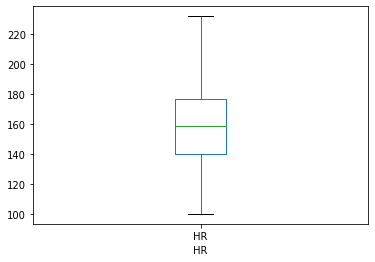

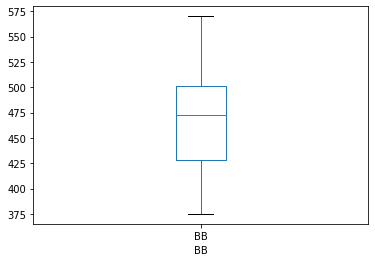

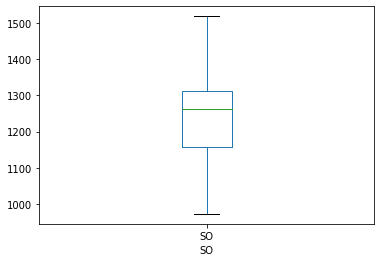

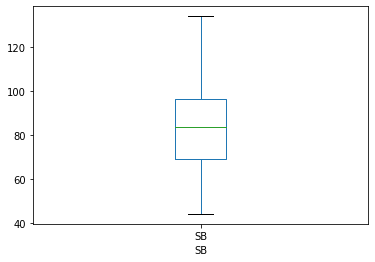

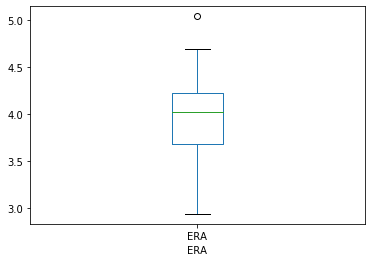

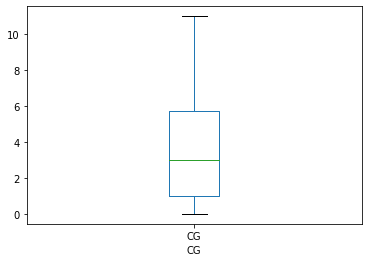

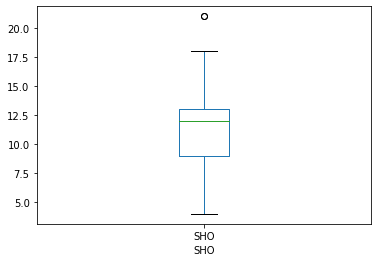

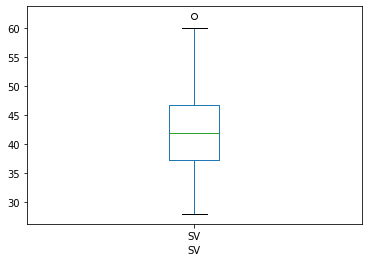

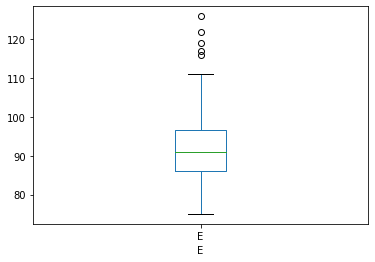

In [12]:
#checking outliers
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Feature Engineering

In [13]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [14]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Outlier removal

In [15]:
#Removing outliers first
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(30, 15)

In [16]:
df=df[(z<3).all(axis=1)]
df.shape

(29, 15)

# Separating training and testing set

In [17]:
#Separating the training and testing set
y=df[['W']]
X=df.drop(['W'],axis=1)

In [18]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# Skewness removal by log transformation technique

In [19]:
#removing skewness second
for col in X.columns:
    if X.skew().loc[col]>0.55:
        X[col]=np.log1p(X[col])
    

# Scaling the data

In [20]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [21]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.240415,-0.813262,1.554812,-0.435733
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.240415,0.159299,0.296229,-0.598110
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,1.815711,-0.326982,-0.672787,-1.197382
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.214333,-0.570122,-0.825263,0.538291
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.214333,0.159299,-1.142637,-0.598110


In [22]:
x.skew()

R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

# Model building

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [24]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [25]:
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [27]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    
    
    
    
   
    

***************** KNeighborsRegressor *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.4398635588402502


cross_val_score  - -0.10052841751459604


rmse_score  - 7.84729252672538


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - 0.05335905475563252


cross_val_score  - -0.3247418955144298


rmse_score  - 10.201536105793219


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.8632743368674167


cross_val_score  - 0.3230846318596526


rmse_score  - 3.8770191630476076


***************** DecisionTreeRegressor *******************


DecisionTreeRegressor

In [28]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,43.986356,7.847293,-10.052842
1,SVR,5.335905,10.201536,-32.474190
2,LinearRegression,86.327434,3.877019,32.308463
3,DecisionTreeRegressor,9.152928,9.993748,-210.191566
4,GradientBoostingRegressor,37.933288,8.260423,-130.764516
5,AdaBoostRegressor,20.128229,9.370647,-76.782557
6,RandomForestRegressor,36.023877,8.386522,-42.950210
7,XGBRegressor,29.706738,8.790828,-93.937202


In [29]:
#We can see LinearRegression is performing the best with R2 score=86.32%
#And also the RMSE score is well within range for this particular problem.

In [30]:
#But our target score is 90%
#Hence we will apply Gridsearchcv to the top3 performing model and try to reach 90% score.

In [31]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state for all models

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [33]:
print('knn',maxr2_score(knn,x,y))
print('SVR',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   82   which is   0.6606307222787386
knn 82
max_r2_score is at random_state   54   which is   0.15751001900808537
SVR 54
max_r2_score is at random_state   47   which is   0.9599134796033035
lr 47
max_r2_score is at random_state   47   which is   0.7362858580775038
dt 47
max_r2_score is at random_state   94   which is   0.7785529881360993
gbm 94
max_r2_score is at random_state   70   which is   0.843570300157978
rfr 70
max_r2_score is at random_state   46   which is   0.7928577520640292
xgb 46
max_r2_score is at random_state   94   which is   0.8074791300865601
ada 94


# GridsearchCV

# model2->XGBoostRegressor(random_state=46)=79.28

In [34]:
xgb=XGBRegressor(random_state=46)

In [35]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
grid_search=gscv.fit(x_train,y_train)
grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 3}

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46)
xgb=XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=8)
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print('r2_score=  ',r2_score(y_test,pred))
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score=   0.7699099812659186
RMSE score=  3.627433382759121


Score not more than LinearRegression model.

# model3->AdaboostRegressor(random_state=70)=80.74

In [37]:
ada=AdaBoostRegressor(random_state=70)

In [38]:
parameters=[{'base_estimator':[lr,rfr],'n_estimators':[100,250,500],'learning_rate':[0.1,0.001,1]}]
            
grid_search=GridSearchCV(ada,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.1,
 'n_estimators': 500}

In [50]:

ada=AdaBoostRegressor(random_state=70,base_estimator=RandomForestRegressor(random_state=75),n_estimators=250,learning_rate=0.1)
ada.fit(x_train,y_train)
pred_ada=ada.predict(x_test)
score=r2_score(y_test,pred_ada)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_ada)))

R2_score=   0.7660347551342811
RMSE score=  5.269606247149782


score is not more than LinearRegression model.

# model4->RandomForestRegressor(random_state=70)=84.35

In [46]:
rfr=RandomForestRegressor(random_state=70)

In [47]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfr,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 500}

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70)
rfr=RandomForestRegressor(max_depth=9,min_samples_leaf=1,n_estimators=500)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_score=   0.7854470900473935
RMSE score=  5.0462608434364515


Score not more than LinearRegression model.

# Saving Final LinearRegression model

In [40]:
#From all the model tried above LinearRegression model is performing the best ,
#corresponding random_state=47
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('r2_score=  ',r2_score(y_test,pred))
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score=   0.9599134796033035
RMSE score=  2.231198053012044


In [41]:
from sklearn.externals import joblib
joblib.dump(lr,'Project2-baseball.obj')

['Project2-baseball.obj']

In [42]:
model=joblib.load('Project2-baseball.obj')

In [43]:
pred=model.predict(x_test)
pred

array([[96.98273429],
       [73.53945002],
       [73.79783128],
       [85.57236251],
       [77.02242577],
       [63.61053886],
       [90.37717275],
       [85.63016525]])

# Saving final predictions in file.csv

In [44]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['W'])

In [45]:
final_predictions.to_csv('E:\\final_predictionsbaseball.csv',index=False)

# Conclusion:-